### Index

1. Data scraping and cleanup
2. Q1: Can we find interesting patterns in Tweets contained in our dataset related to the anti-vaccination discourse?
3. Q2: What are the common characteristics of the users involved in these Tweets?
4. Q3: Based on the Tweets, how did this movement evolve over time and across geographical locations?
4.1 Time analysis
4.1.1 Overall breakdown
4.1.2 Per-hashtag breakdown
4.2 Location analysis
5. Ethical analysis

### 1. Data scraping and cleanup
The data was collected by running the included 'scrape.py' file. What follows now is the cleanup process:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Merge all files into one DataFrame

hashtags = ["#vaccineskill", "#vaccinesharm", "#nojab", "#stoptheshot", "#VAIDS"]

tweets = pd.read_json(f"data\\{hashtags[0]}-tweets.json", lines = True)

for hashtag in hashtags[1:]:
    tmp_df = pd.read_json(f"data\\{hashtag}-tweets.json", lines = True)
    tweets = pd.concat([tweets, tmp_df])

tweets

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/KreugerDunning/status/1495...,2022-02-20 23:55:25+00:00,@nilikm LOOOL sais the weirdo with a mask in h...,@nilikm LOOOL sais the weirdo with a mask in h...,1495547672547278856,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.495477e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[CovidIsOver, TrudeauTyranny, VaccinesKill]",NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/FarmSailing/status/1495474...,2022-02-20 19:05:23+00:00,“Israel had been a early trailblazer of a nati...,“Israel had been a early trailblazer of a nati...,1495474680924418052,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,16,15,...,None,NaN,None,NaN,None,None,None,None,"[ccpvirus, vaccineskill, novaccinemandates, wh...",NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/FeelingSoGr8t/status/14953...,2022-02-20 13:24:35+00:00,https://t.co/Qei7wpaNj9 \n\n#vaccineskill,instagram.com/tv/CaH0tj8Adta… \n\n#vaccineskill,1495388918694428674,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,[vaccineskill],NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/InalaBrisbane/status/14953...,2022-02-20 12:00:05+00:00,Terrific interview by @mariaaazeee with @DowdE...,Terrific interview by @mariaaazeee with @DowdE...,1495367652478369793,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,7,...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[vaccineinjuries, HoldtheLine, PfizerFraud, Va...",NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/teakalmia/status/149515056...,2022-02-19 21:37:26+00:00,#TruckersForFreedom2022 #VaccinesKill https:/...,#TruckersForFreedom2022 #VaccinesKill twitter...,1495150560504430600,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,None,"[TruckersForFreedom2022, VaccinesKill]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,snscrape.modules.twitter.Tweet,https://twitter.com/ItCouldAlwaysB1/status/144...,2021-10-12 16:00:29+00:00,VAIDS = Vaccine Acquired Immune Deficiency Syn...,VAIDS = Vaccine Acquired Immune Deficiency Syn...,1447955338460745733,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,...,None,NaN,None,NaN,None,None,None,None,[VAIDS],None
4733,snscrape.modules.twitter.Tweet,https://twitter.com/theallinoneteam/status/137...,2021-04-04 21:33:10+00:00,Maybe a new illness will be created? VAIDS! V...,Maybe a new illness will be created? VAIDS! V...,1378822981112229889,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,[VAIDS],None
4734,snscrape.modules.twitter.Tweet,https://twitter.com/SundayEwolabi/status/13327...,2020-11-28 19:24:17+00:00,@richy_os @Johannxs @HMKemiAdeosun The selfish...,@richy_os @Johannxs @HMKemiAdeosun The selfish...,1332767287154241542,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,...,None,NaN,None,1.332700e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[VAIDS],None
4735,snscrape.modules.twitter.Tweet,https://twitter.com/GorwayGlobal/status/133203...,2020-11-26 18:56:26+00:00,"What if India's Drug regulator, @CDSCO_INDIA_I...","What if India's Drug regulator, @CDSCO_INDIA_I...",1332035503072419843,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[Vaids],None


In [2]:
tweets.shape

(17693, 28)

In [3]:
tweets.columns.values

array(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
       'quotedTweet', 'inReplyToTweetId', 'inReplyToUser',
       'mentionedUsers', 'coordinates', 'place', 'hashtags', 'cashtags'],
      dtype=object)

In [4]:
# Drop columns that contain useless information
columns_to_drop = ['_type', 'url', 'renderedContent', 'conversationId', 'source', 'sourceUrl', 'tcooutlinks', 'coordinates', 'cashtags']
tweets = tweets.drop(columns=columns_to_drop)
tweets

,date,content,id,user,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,outlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,place,hashtags
0,2022-02-20 23:55:25+00:00,@nilikm LOOOL sais the weirdo with a mask in h...,1495547672547278856,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,en,Twitter for Android,None,None,NaN,None,1.495477e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[CovidIsOver, TrudeauTyranny, VaccinesKill]"
1,2022-02-20 19:05:23+00:00,“Israel had been a early trailblazer of a nati...,1495474680924418052,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,16,15,0,en,Twitter Web App,[https://insiderpaper.com/israel-pm-announces-...,None,NaN,None,NaN,None,None,None,"[ccpvirus, vaccineskill, novaccinemandates, wh..."
2,2022-02-20 13:24:35+00:00,https://t.co/Qei7wpaNj9 \n\n#vaccineskill,1495388918694428674,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,und,Twitter for iPhone,[https://www.instagram.com/tv/CaH0tj8Adta/?utm...,None,NaN,None,NaN,None,None,None,[vaccineskill]
3,2022-02-20 12:00:05+00:00,Terrific interview by @mariaaazeee with @DowdE...,1495367652478369793,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,7,0,en,Twitter for iPhone,[https://zeeemedia.com/interview/edward-dowd-f...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[vaccineinjuries, HoldtheLine, PfizerFraud, Va..."
4,2022-02-19 21:37:26+00:00,#TruckersForFreedom2022 #VaccinesKill https:/...,1495150560504430600,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,und,Twitter Web App,[https://twitter.com/teakalmia/status/14951497...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,"[TruckersForFreedom2022, VaccinesKill]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,2021-10-12 16:00:29+00:00,VAIDS = Vaccine Acquired Immune Deficiency Syn...,1447955338460745733,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,0,en,Twitter Web App,None,None,NaN,None,NaN,None,None,None,[VAIDS]
4733,2021-04-04 21:33:10+00:00,Maybe a new illness will be created? VAIDS! V...,1378822981112229889,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,en,Twitter Web App,None,None,NaN,None,NaN,None,None,None,[VAIDS]
4734,2020-11-28 19:24:17+00:00,@richy_os @Johannxs @HMKemiAdeosun The selfish...,1332767287154241542,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,0,en,Twitter for Android,None,None,NaN,None,1.332700e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,[VAIDS]
4735,2020-11-26 18:56:26+00:00,"What if India's Drug regulator, @CDSCO_INDIA_I...",1332035503072419843,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,1,en,Twitter Web App,[https://twitter.com/das_seed/status/132731980...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,[Vaids]


In [5]:
tweets['id'].nunique()

17615

In [6]:
# Number of unique Tweets != total number of Tweets --> duplicate entries
# Drop duplicate Tweets
tweets = tweets.drop_duplicates(subset='id')

# Use Tweet ID to identify data entries
tweets['id'] = tweets['id'].map(str)
tweets = tweets.set_index('id')

# The "+00:00" in entries in the 'date' column indicate the UTC timezone. It looks ugly, so let's remove it.
tweets['date'] = tweets['date'].dt.tz_localize(None)

tweets

C:\Users\Perso\AppData\Local\Temp/ipykernel_4152/3728182720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['id'] = tweets['id'].map(str)


,date,content,user,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,outlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,place,hashtags
id,,,,,,,,,,,,,,,,,,
1495547672547278856,2022-02-20 23:55:25,@nilikm LOOOL sais the weirdo with a mask in h...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,en,Twitter for Android,None,None,NaN,None,1.495477e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[CovidIsOver, TrudeauTyranny, VaccinesKill]"
1495474680924418052,2022-02-20 19:05:23,“Israel had been a early trailblazer of a nati...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,16,15,0,en,Twitter Web App,[https://insiderpaper.com/israel-pm-announces-...,None,NaN,None,NaN,None,None,None,"[ccpvirus, vaccineskill, novaccinemandates, wh..."
1495388918694428674,2022-02-20 13:24:35,https://t.co/Qei7wpaNj9 \n\n#vaccineskill,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,und,Twitter for iPhone,[https://www.instagram.com/tv/CaH0tj8Adta/?utm...,None,NaN,None,NaN,None,None,None,[vaccineskill]
1495367652478369793,2022-02-20 12:00:05,Terrific interview by @mariaaazeee with @DowdE...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,7,0,en,Twitter for iPhone,[https://zeeemedia.com/interview/edward-dowd-f...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[vaccineinjuries, HoldtheLine, PfizerFraud, Va..."
1495150560504430600,2022-02-19 21:37:26,#TruckersForFreedom2022 #VaccinesKill https:/...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,und,Twitter Web App,[https://twitter.com/teakalmia/status/14951497...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,"[TruckersForFreedom2022, VaccinesKill]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447955338460745733,2021-10-12 16:00:29,VAIDS = Vaccine Acquired Immune Deficiency Syn...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,0,en,Twitter Web App,None,None,NaN,None,NaN,None,None,None,[VAIDS]
1378822981112229889,2021-04-04 21:33:10,Maybe a new illness will be created? VAIDS! V...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,en,Twitter Web App,None,None,NaN,None,NaN,None,None,None,[VAIDS]
1332767287154241542,2020-11-28 19:24:17,@richy_os @Johannxs @HMKemiAdeosun The selfish...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,0,en,Twitter for Android,None,None,NaN,None,1.332700e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,[VAIDS]


In [7]:
tweets['lang'].unique()

array(['en', 'und', 'fr', 'es', 'pl', 'zh', 'tr', 'nl', 'ca', 'it', 'ar',
       'el', 'cs', 'sv', 'de', 'hi', 'pt', 'da', 'tl', 'sr', 'in', 'et',
       'no', 'lv', 'ht', 'ja', 'ro', 'fi', 'cy', 'lt', 'sl', 'is', 'th',
       'hu', 'mr', 'bg', 'ko'], dtype=object)

In [8]:
# Clean up 'lang' column
replacements = {
    'en': 'English',
    'und': 'Unknown',
    'fr': 'French',
    'es': 'Spanish',
    'pl': 'Polish',
    'zh': 'Chinese',
    'tr': 'Turkish',
    'nl': 'Dutch',
    'ca': 'Catalan',
    'it': 'Italian',
    'ar': 'Arabic',
    'el': 'Greek',
    'cs': 'Czech',
    'sv': 'Swedish',
    'de': 'German',
    'hi': 'Hindi',
    'pt': 'Portugese',
    'da': 'Danish',
    'tl': 'Tagalog',
    'sr': 'Serbian',
    'in': 'Unknown',
    'et': 'Estonian',
    'no': 'Norwegian',
    'lv': 'Latvian',
    'ht': 'Haitian',
    'ja': 'Japanese',
    'ro': 'Romanian',
    'fi': 'Finnish',
    'cy': 'Welsch',
    'lt': 'Lithuanian',
    'sl': 'Slovenian',
    'is': 'Icelandic',
    'th': 'Thai',
    'hu': 'Hungarian',
    'mr': 'Marathi',
    'bg': 'Bulgarian',
    'ko': 'Korean',
}
# Symbolic meanings gathered from https://developer.twitter.com/en/docs/twitter-for-websites/supported-languages and https://www.loc.gov/standards/iso639-2/php/code_list.php
tweets['lang'] = tweets['lang'].replace(replacements)
tweets

,date,content,user,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,outlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,place,hashtags
id,,,,,,,,,,,,,,,,,,
1495547672547278856,2022-02-20 23:55:25,@nilikm LOOOL sais the weirdo with a mask in h...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,English,Twitter for Android,None,None,NaN,None,1.495477e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[CovidIsOver, TrudeauTyranny, VaccinesKill]"
1495474680924418052,2022-02-20 19:05:23,“Israel had been a early trailblazer of a nati...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,16,15,0,English,Twitter Web App,[https://insiderpaper.com/israel-pm-announces-...,None,NaN,None,NaN,None,None,None,"[ccpvirus, vaccineskill, novaccinemandates, wh..."
1495388918694428674,2022-02-20 13:24:35,https://t.co/Qei7wpaNj9 \n\n#vaccineskill,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,Unknown,Twitter for iPhone,[https://www.instagram.com/tv/CaH0tj8Adta/?utm...,None,NaN,None,NaN,None,None,None,[vaccineskill]
1495367652478369793,2022-02-20 12:00:05,Terrific interview by @mariaaazeee with @DowdE...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,7,0,English,Twitter for iPhone,[https://zeeemedia.com/interview/edward-dowd-f...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[vaccineinjuries, HoldtheLine, PfizerFraud, Va..."
1495150560504430600,2022-02-19 21:37:26,#TruckersForFreedom2022 #VaccinesKill https:/...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,Unknown,Twitter Web App,[https://twitter.com/teakalmia/status/14951497...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,"[TruckersForFreedom2022, VaccinesKill]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447955338460745733,2021-10-12 16:00:29,VAIDS = Vaccine Acquired Immune Deficiency Syn...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,0,English,Twitter Web App,None,None,NaN,None,NaN,None,None,None,[VAIDS]
1378822981112229889,2021-04-04 21:33:10,Maybe a new illness will be created? VAIDS! V...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,English,Twitter Web App,None,None,NaN,None,NaN,None,None,None,[VAIDS]
1332767287154241542,2020-11-28 19:24:17,@richy_os @Johannxs @HMKemiAdeosun The selfish...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,0,English,Twitter for Android,None,None,NaN,None,1.332700e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,[VAIDS]


In [9]:
users = tweets['user'].tolist()
users = pd.DataFrame(users)
users

,_type,username,id,displayname,description,rawDescription,descriptionUrls,verified,created,followersCount,...,listedCount,mediaCount,location,protected,linkUrl,linkTcourl,profileImageUrl,profileBannerUrl,label,url
0,snscrape.modules.twitter.User,KreugerDunning,1491647986123911168,Dunning Kruger,On an account suspended spree. \n\nGovernments...,On an account suspended spree. \n\nGovernments...,None,False,2022-02-10T05:39:38+00:00,15,...,1,92,,False,None,None,https://pbs.twimg.com/profile_images/149466900...,https://pbs.twimg.com/profile_banners/14916479...,None,https://twitter.com/KreugerDunning
1,snscrape.modules.twitter.User,FarmSailing,1397779652949643271,Himalaya Sailing Vancouver Farm,Official Twitter Account of Himalaya Sailing F...,Official Twitter Account of Himalaya Sailing F...,None,False,2021-05-27T05:00:52+00:00,258,...,3,209,,False,None,None,https://pbs.twimg.com/profile_images/145664910...,https://pbs.twimg.com/profile_banners/13977796...,None,https://twitter.com/FarmSailing
2,snscrape.modules.twitter.User,FeelingSoGr8t,1385002277736521731,Feelin'Gr8 WesternCulture ≠ ChristianCulture,Christian PharmD Flat-earther Vocalist Natura...,Christian PharmD Flat-earther Vocalist Natura...,None,False,2021-04-21T22:47:43+00:00,260,...,2,211,Flat Earth TN /Bayou Lafourche,False,None,None,https://pbs.twimg.com/profile_images/147952044...,https://pbs.twimg.com/profile_banners/13850022...,None,https://twitter.com/FeelingSoGr8t
3,snscrape.modules.twitter.User,InalaBrisbane,979707807111921664,William Ridley🌸,"Inala, Brisbane, Australia 🇦🇺 🇺🇸🇬🇧 🇨🇦 🇹🇭 🇮🇱 It...","Inala, Brisbane, Australia 🇦🇺 🇺🇸🇬🇧 🇨🇦 🇹🇭 🇮🇱 It...",None,False,2018-03-30T13:11:58+00:00,2040,...,4,2456,"Inala, Brisbane",False,None,None,https://pbs.twimg.com/profile_images/147606061...,https://pbs.twimg.com/profile_banners/97970780...,None,https://twitter.com/InalaBrisbane
4,snscrape.modules.twitter.User,teakalmia,331786486,Tea Kalmia,Blessed the Nation whose God is Yahushua (Jesu...,Blessed the Nation whose God is Yahushua (Jesu...,None,False,2011-07-08T18:23:38+00:00,198,...,0,1120,USA,False,None,None,https://pbs.twimg.com/profile_images/902215454...,None,None,https://twitter.com/teakalmia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17610,snscrape.modules.twitter.User,ItCouldAlwaysB1,1387196275402018817,"It Could Always Be Worse, It Will Get Worse",Heavy Groovy Metal. God Bless and good luck!,Heavy Groovy Metal. God Bless and good luck!,None,False,2021-04-28T00:06:05+00:00,265,...,4,406,D.P.R.California,False,None,None,https://pbs.twimg.com/profile_images/138759546...,https://pbs.twimg.com/profile_banners/13871962...,None,https://twitter.com/ItCouldAlwaysB1
17611,snscrape.modules.twitter.User,theallinoneteam,462464578,The All in One Team↗,We are a group of like minded individuals #fre...,We are a group of like minded individuals #fre...,None,False,2012-01-13T00:05:12+00:00,3218,...,10,383,"Yellowknife, NWT",False,https://vernoncoleman.org/videos/finally-medic...,https://t.co/BSrKz7luRF,https://pbs.twimg.com/profile_images/138932194...,https://pbs.twimg.com/profile_banners/46246457...,None,https://twitter.com/theallinoneteam
17612,snscrape.modules.twitter.User,SundayEwolabi,2944593299,sunday Najeriya ewolabi,I love Nigeria to the hilt.\n🇳🇬🇳🇬,I love Nigeria to the hilt.\n🇳🇬🇳🇬,None,False,2014-12-27T20:35:26+00:00,373,...,15,281,Nigeria,False,None,None,https://pbs.twimg.com/profile_images/148173447...,None,None,https://twitter.com/SundayEwolabi
17613,snscrape.modules.twitter.User,GorwayGlobal,326142866,JayEnAar,Public health physician. \nArriving at the rig...,Public health physician. \nArriving at the rig...,None,False,2011-06-29T13:01:40+00:00,8049,...,113,8100,,False,https://muckrack.com/profile/portfolio,https://t.co/spgk2R1XkB,https://pbs.twimg.com/profile_images/101208784...,https://pbs.twimg.com/profile_banners/32614286...,None,https://twitter.com/GorwayGlobal


In [10]:
# Drop columns that contain useless information
columns_to_drop = ['_type', 'displayname', 'rawDescription', 'linkTcourl', 'profileImageUrl', 'profileBannerUrl', 'label', 'url']
users = users.drop(columns=columns_to_drop)

# Replace 'user' column in Tweets with userIds
users['id'] = users['id'].map(str)
tweets['user'] = users['id'].values
tweets = tweets.rename(columns={'user': 'userId'})

# Drop duplicate users
users = users.drop_duplicates(subset='id')

# Use user ID to identify data entries
users = users.set_index('id')

# The "+00:00" in entries in the 'created' column indicate the UTC timezone. It looks ugly, so let's remove it.
users['created'] = pd.to_datetime(users['created'])
users['created'] = users['created'].dt.tz_localize(None)

# Fix column 'descriptionUrls'
replacement = []

for entry in users['descriptionUrls']:
    urls = 'None'
    if entry is not None:
        urls = []
        for url in entry:
            urls.append(url['url'])
    replacement.append(urls)

users['descriptionUrls'] = replacement

users

,username,description,descriptionUrls,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl
id,,,,,,,,,,,,,,
1491647986123911168,KreugerDunning,On an account suspended spree. \n\nGovernments...,None,False,2022-02-10 05:39:38,15,143,588,865,1,92,,False,None
1397779652949643271,FarmSailing,Official Twitter Account of Himalaya Sailing F...,None,False,2021-05-27 05:00:52,258,76,2739,239,3,209,,False,None
1385002277736521731,FeelingSoGr8t,Christian PharmD Flat-earther Vocalist Natura...,None,False,2021-04-21 22:47:43,260,290,4062,16240,2,211,Flat Earth TN /Bayou Lafourche,False,None
979707807111921664,InalaBrisbane,"Inala, Brisbane, Australia 🇦🇺 🇺🇸🇬🇧 🇨🇦 🇹🇭 🇮🇱 It...",None,False,2018-03-30 13:11:58,2040,2694,8514,11899,4,2456,"Inala, Brisbane",False,None
331786486,teakalmia,Blessed the Nation whose God is Yahushua (Jesu...,None,False,2011-07-08 18:23:38,198,1006,22784,254,0,1120,USA,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430033430834814976,BrimstonedLLC,"Peace and Love, or some shit.",None,False,2021-08-24 05:05:31,421,402,8215,5648,0,1248,Twitternment Camp 27,False,None
1387196275402018817,ItCouldAlwaysB1,Heavy Groovy Metal. God Bless and good luck!,None,False,2021-04-28 00:06:05,265,1193,3712,16996,4,406,D.P.R.California,False,None
462464578,theallinoneteam,We are a group of like minded individuals #fre...,None,False,2012-01-13 00:05:12,3218,3802,7055,2548,10,383,"Yellowknife, NWT",False,https://vernoncoleman.org/videos/finally-medic...


In [11]:
tweets

,date,content,userId,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,outlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,place,hashtags
id,,,,,,,,,,,,,,,,,,
1495547672547278856,2022-02-20 23:55:25,@nilikm LOOOL sais the weirdo with a mask in h...,1491647986123911168,0,0,0,0,English,Twitter for Android,None,None,NaN,None,1.495477e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[CovidIsOver, TrudeauTyranny, VaccinesKill]"
1495474680924418052,2022-02-20 19:05:23,“Israel had been a early trailblazer of a nati...,1397779652949643271,0,16,15,0,English,Twitter Web App,[https://insiderpaper.com/israel-pm-announces-...,None,NaN,None,NaN,None,None,None,"[ccpvirus, vaccineskill, novaccinemandates, wh..."
1495388918694428674,2022-02-20 13:24:35,https://t.co/Qei7wpaNj9 \n\n#vaccineskill,1385002277736521731,0,0,0,0,Unknown,Twitter for iPhone,[https://www.instagram.com/tv/CaH0tj8Adta/?utm...,None,NaN,None,NaN,None,None,None,[vaccineskill]
1495367652478369793,2022-02-20 12:00:05,Terrific interview by @mariaaazeee with @DowdE...,979707807111921664,1,1,7,0,English,Twitter for iPhone,[https://zeeemedia.com/interview/edward-dowd-f...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,"[vaccineinjuries, HoldtheLine, PfizerFraud, Va..."
1495150560504430600,2022-02-19 21:37:26,#TruckersForFreedom2022 #VaccinesKill https:/...,331786486,0,0,0,0,Unknown,Twitter Web App,[https://twitter.com/teakalmia/status/14951497...,None,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,None,"[TruckersForFreedom2022, VaccinesKill]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447955338460745733,2021-10-12 16:00:29,VAIDS = Vaccine Acquired Immune Deficiency Syn...,1387196275402018817,0,1,3,0,English,Twitter Web App,None,None,NaN,None,NaN,None,None,None,[VAIDS]
1378822981112229889,2021-04-04 21:33:10,Maybe a new illness will be created? VAIDS! V...,462464578,0,0,0,0,English,Twitter Web App,None,None,NaN,None,NaN,None,None,None,[VAIDS]
1332767287154241542,2020-11-28 19:24:17,@richy_os @Johannxs @HMKemiAdeosun The selfish...,2944593299,1,0,3,0,English,Twitter for Android,None,None,NaN,None,1.332700e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,[VAIDS]


In [12]:
# Fix column 'outlinks'
replacement = []

for outlink in tweets['outlinks']:
    link = 'None'
    if outlink is not None:
        link = outlink[0]
    replacement.append(link)

tweets['outlinks'] = replacement

In [13]:
tweets['retweetedTweet'].unique()

array([nan])

In [14]:
# Column 'retweetedTweet' is useless --> drop it
tweets = tweets.drop(columns='retweetedTweet')

# Fix column 'media'
replacement = []

for entry in tweets['media']:
    containsMedia = False
    if entry is not None:
        containsMedia = True
    replacement.append(containsMedia)

tweets['media'] = replacement
tweets = tweets.rename(columns={'media': 'containsMedia'})

# Fix column 'quotedTweet'
replacement = []
for entry in tweets['quotedTweet']:
    quoteTweetID = 'None'
    if entry is not None:
        quoteTweetID = str(entry['id'])
    replacement.append(quoteTweetID)

tweets['quotedTweet'] = replacement
tweets = tweets.rename(columns={'quotedTweet': 'quoteTweetId'})

# Fix column 'inReplyToTweetId'
tweets['inReplyToTweetId'] = tweets['inReplyToTweetId'].fillna(0)
tweets['inReplyToTweetId'] = tweets['inReplyToTweetId'].map(int).map(str)
tweets['inReplyToTweetId'] = tweets['inReplyToTweetId'].replace({'0': 'None'})

# Fix column 'inReplyToUser'
replacement = []

for entry in tweets['inReplyToUser']:
    replyUserId = 'None'
    if entry is not None:
        replyUserId = str(entry['id'])
    replacement.append(replyUserId)

tweets['inReplyToUser'] = replacement
tweets = tweets.rename(columns={'inReplyToUser': 'inReplyToUserId'})

# Fix column 'place'
replacement = []

for entry in tweets['place']:
    country = 'None'
    if entry is not None:
        country = entry['country']
    replacement.append(country)

tweets['place'] = replacement
tweets = tweets.rename(columns={'place': 'country'})

# Fix column 'mentionedUsers'
replacement = []

for entry in tweets['mentionedUsers']:
    mentionedUserIds = 'None'
    if entry is not None:
        mentionedUserIds = []
        for mentionedUser in entry:
            mentionedUserId = str(mentionedUser['id'])
            mentionedUserIds.append(mentionedUserId)
    replacement.append(mentionedUserIds)

tweets['mentionedUsers'] = replacement
tweets = tweets.rename(columns={'mentionedUsers': 'mentionedUserIds'})

tweets

,date,content,userId,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,outlinks,containsMedia,quoteTweetId,inReplyToTweetId,inReplyToUserId,mentionedUserIds,country,hashtags
id,,,,,,,,,,,,,,,,,
1495547672547278856,2022-02-20 23:55:25,@nilikm LOOOL sais the weirdo with a mask in h...,1491647986123911168,0,0,0,0,English,Twitter for Android,None,False,None,1495477036730793984,155930120,[155930120],None,"[CovidIsOver, TrudeauTyranny, VaccinesKill]"
1495474680924418052,2022-02-20 19:05:23,“Israel had been a early trailblazer of a nati...,1397779652949643271,0,16,15,0,English,Twitter Web App,https://insiderpaper.com/israel-pm-announces-e...,False,None,None,None,None,None,"[ccpvirus, vaccineskill, novaccinemandates, wh..."
1495388918694428674,2022-02-20 13:24:35,https://t.co/Qei7wpaNj9 \n\n#vaccineskill,1385002277736521731,0,0,0,0,Unknown,Twitter for iPhone,https://www.instagram.com/tv/CaH0tj8Adta/?utm_...,False,None,None,None,None,None,[vaccineskill]
1495367652478369793,2022-02-20 12:00:05,Terrific interview by @mariaaazeee with @DowdE...,979707807111921664,1,1,7,0,English,Twitter for iPhone,https://zeeemedia.com/interview/edward-dowd-fo...,False,None,None,None,"[1432287790541144066, 1570180292]",None,"[vaccineinjuries, HoldtheLine, PfizerFraud, Va..."
1495150560504430600,2022-02-19 21:37:26,#TruckersForFreedom2022 #VaccinesKill https:/...,331786486,0,0,0,0,Unknown,Twitter Web App,https://twitter.com/teakalmia/status/149514975...,False,1495149758012395533,None,None,None,None,"[TruckersForFreedom2022, VaccinesKill]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447955338460745733,2021-10-12 16:00:29,VAIDS = Vaccine Acquired Immune Deficiency Syn...,1387196275402018817,0,1,3,0,English,Twitter Web App,None,False,None,None,None,None,None,[VAIDS]
1378822981112229889,2021-04-04 21:33:10,Maybe a new illness will be created? VAIDS! V...,462464578,0,0,0,0,English,Twitter Web App,None,False,None,None,None,None,None,[VAIDS]
1332767287154241542,2020-11-28 19:24:17,@richy_os @Johannxs @HMKemiAdeosun The selfish...,2944593299,1,0,3,0,English,Twitter for Android,None,False,None,1332699553087229952,700732560,"[700732560, 78625783, 847719571129720832]",None,[VAIDS]


### 2. Q1: Can we detect any interesting patterns in Tweets contained in our dataset ?


In order to answer our very first research question, we have conducted explatory data analysis on our dataset.
We first began by analzying the content of the tweets to see the most frequently used terms and expressions within the tweets related to anti-vaccination discourse. Since our dataset contains tweets in various languages, it is useful for us to see how diverse and balanced our dataset is in terms of the language.

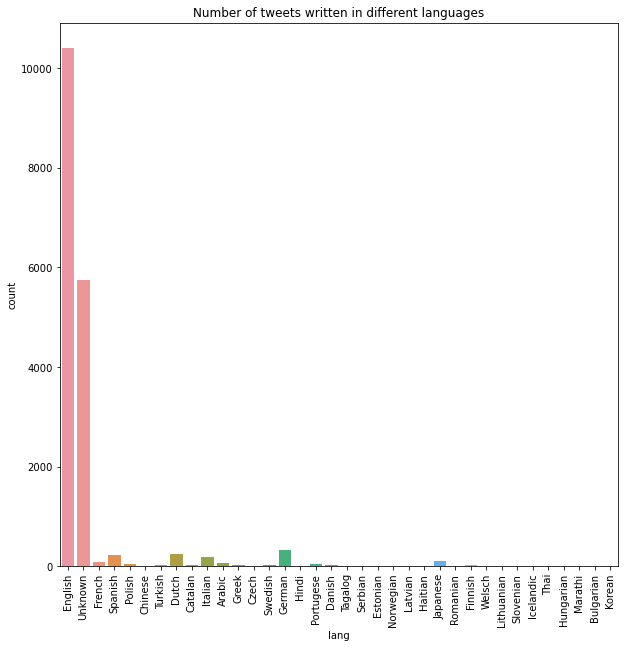

In [15]:
# create a countplot demonstrating the count of each language class that appears in our dataset
plt.figure(figsize = (10,10))
sns.countplot(x="lang", data=tweets)
plt.xticks(rotation=90)
plt.title("Number of tweets written in different languages")
plt.show()

As we can see from the count plot for languages of the tweets, most of the tweets in the dataset are in English as expected. Therefore, it would be sensible to analyze only the tweets in English as there are not enough number of instances that belong to other language classes.

We extracted and visualized the frequent and impactful terms that appear in the actual content of the tweets by using word clouds which is a collection of words depicted in different sizes depending on their frequency within the text. It makes it easier for us to observe and detect the most important terms which are used in the tweets.

In [16]:
## observe the words used in tweets, apart from the hashtags

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

def create_wordCloud(dataframe):

    ''' creates a wordcloud from a given pandas dataframe containing tweets
        return the generated wordcloud of type Image. '''
    stopwords = set(STOPWORDS)
    comment_words = ''
    dataframe = dataframe.reset_index()


    for i in range (1,len(dataframe['content'])) :
        #remove links from tweets
        dataframe['content'][i]= re.sub(r'http\S+', ' ', dataframe['content'][i], flags=re.MULTILINE)
        dataframe['content'][i]= re.sub(r'#\S+', ' ', dataframe['content'][i], flags=re.MULTILINE)

    ## create a visualization of the words used in the tweets
    for tweet in dataframe['content'] :

        tweet = str(tweet)
        tokens = tweet.split()

        for i in range(len(tokens)) :
            tokens[i] = tokens[i].lower()
            comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',
                          stopwords = stopwords).generate(comment_words)


    return wordcloud

In [17]:
import warnings
warnings.filterwarnings('ignore')

eng_tweets = tweets.loc[tweets['lang'] == 'English']
wordcloud = create_wordCloud(eng_tweets)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("wordcloud of the tweets in English")
plt.show()

KeyboardInterrupt: 

In [ ]:
import datetime
oldest_tweet_date = min(tweets['date'])
latest_tweet_date = max(tweets['date'])
print('Oldest tweet date : ',oldest_tweet_date)
print('Latest tweet date : ', latest_tweet_date)

As seen in the plotted word cloud above, the most frequently appearing terms overall for all the tweets contained in the dataset are rather generic. Therefore, in order to gain more insight about the most frequently used terms, we divided our dataset into 5 groups,based on the date that each tweet was tweeted. The oldest tweet in our dataset was tweeted on 1 January 2020 and the latest one was tweeted on 2 February 2022. So we divided our tweets into the following parts : the first half of 2020,the second half of 2020, the first half of 2021, the second half of 2021 and lastly, the beginning of 2022.

In [ ]:
## get the tweets between 2020-01-01 until 2020-07-01
start_date = oldest_tweet_date
end_date = datetime.datetime(2020, 7, 1,0,0)
tweets_20_1 = eng_tweets.loc[(eng_tweets['date'] >= start_date) & (eng_tweets['date'] < end_date)]
cloud_20_1 = create_wordCloud(tweets_20_1['content'])

## get the tweets between 2020-07-01 until 2021-1-1
start_date = datetime.datetime(2020, 7, 1,0,0)
end_date = datetime.datetime(2021, 1,1,0,0)
tweets_20_2 = eng_tweets.loc[(eng_tweets['date'] >= start_date) & (eng_tweets['date'] < end_date)]
cloud_20_2 = create_wordCloud(tweets_20_2['content'])

## get the tweets between 2021-01-01 until 2021-7-1
start_date = datetime.datetime(2021, 1,1,0,0)
end_date = datetime.datetime(2021, 7,1,0,0)
tweets_21_1 = eng_tweets.loc[(eng_tweets['date'] >= start_date) & (eng_tweets['date'] < end_date)]
cloud_21_1 = create_wordCloud(tweets_21_1['content'])

## get the tweets between 2021-07-01 until 2022-1-1
start_date = datetime.datetime(2021, 7,1,0,0)
end_date = datetime.datetime(2022, 1,1,0,0)
tweets_21_2 = eng_tweets.loc[(eng_tweets['date'] >= start_date) & (eng_tweets['date'] < end_date)]
cloud_21_2 = create_wordCloud(tweets_21_2['content'])

## get the tweets between 2022-01-01 until the latest date
start_date = datetime.datetime(2022, 1,1,0,0)
end_date = latest_tweet_date
tweets_22_1 = eng_tweets.loc[(eng_tweets['date'] >= start_date) & (eng_tweets['date'] < end_date)]
cloud_22_1 = create_wordCloud(tweets_22_1['content'])

In [ ]:
# visualize the most frequent words in tweets
fig = plt.figure(figsize = (15,15))
fig.suptitle('Frequent tweets used in Different Time Frames ')
ax1 = fig.add_subplot(3,3,1)
ax1.title.set_text('Tweets from the 1st half of 2020')
plt.imshow(cloud_20_1)

ax2 = fig.add_subplot(3,3,2)
ax2.title.set_text('Tweets from the 2nd half of 2020 ')
plt.imshow(cloud_20_2)

ax3 = fig.add_subplot(3,3,3)
ax3.title.set_text('Tweets from the 1st half of 2021')
plt.imshow(cloud_21_1)

ax4 = fig.add_subplot(3,3,4)
ax4.title.set_text('Tweets from the 2nd half of 2021')
plt.imshow(cloud_21_2)

ax5 = fig.add_subplot(3,3,5)
ax5.title.set_text('Tweets from the beginning of 2022')
plt.imshow(cloud_22_1)

plt.show()

As seen in the word clouds of frequently used words for each different time frame, splitting up the dates help us observe the content of the tweets in a more detailed way. The word clouds give us an idea of the evolution of the anti-vaccination discourse over time.

If we have a closer look at the first of half of 2020, around the time when the covid vaccines started to being used, we see that a lot of tweets from that time frame contain the non-generic words, 'truth', 'believe' 'bill gates'. In the second half, the word 'celebrities' stands out as well as 'TV' and 'Youtube' although they're not very significant. This could be interpreted as, in the beginning, the tweets contained content that could be considered as 'conspiracy theories', whereas, in the second half of 2020, the discourse went into the direction of the impact of media and celebrities on the vaccination campaigns.

In case of 2021, the time in which covid vaccines were commonly in use around the world, we observe that the words 'death', 'side effects', 'died taking', 'children' were the most appearing words. We can infer that, compared to 2020, people engaging in anti-vaccination discourse on Twitter were more concerned about the potential risks and the side effects of the vaccine especially for young individuals instead of the 'conspiracy theories' and the influence of media.

Lastly, if we have a closer look to the tweets from the begging of 2022, we encounter an entirely different word cloud. It mostly contains the terms 'immune system', 'aids, 'hiv' and 'immune deficiency'.

#### Trending hashtags


Hashtags on Twitter provide us an idea of on what topic the given tweets is mainly centered around. Therefore, to validate the interpretation that we have made based on the tweet content and the wordclouds, and to observe the anti-vaccination discourse on the platform more closely, we can delve deeper into the trending hashtags.

In [ ]:
def get_top_hashtags(df,top = 50,drop_default = False):
    '''given a tweet dataframe, return top  n hashtags based on their frequenc'''

    df = df.explode('hashtags')
    top_hashtags = df['hashtags'].value_counts()[:top]

    if drop_default == True:
        default_hashtags = ['stoptheshot', 'VAIDS', 'StopTheShot', 'nojab','Nojab', 'NOJAB', 'vaccineskill','VaccinesKill','VACCINESKILL', 'NoJab','vaids','Vaids','vaccines', 'Vaccines']
        for hashtag in top_hashtags.index.tolist() :
            for entry in default_hashtags :
                if hashtag == entry:
                    top_hashtags = top_hashtags.drop(entry)

    return top_hashtags

In [ ]:
top_hashtags = get_top_hashtags(tweets, drop_default = True)
top_hashtags.plot(figsize = (10,10) ,kind = 'barh', title = 'The most frequently used hashtags overall')

As seen in the count plot above, #covid19, #DoNotComply, #VaccineSideEffects, #vaccine and #HIV were the top five popular hashtags overall in the tweets contained in our sample. However, this does not provide us any insight on how the anti-vaccination discourse has evolved over time. Therefore, we get the divided tweets that we have used for observing the content of the tweets, and analyzed the most popular hashtags based on a certain time frame.

In [ ]:
top_hashtags_20_1 = get_top_hashtags(tweets_20_1, top = 15, drop_default= True)
top_hashtags_20_2 = get_top_hashtags(tweets_20_2, top = 12,drop_default= True)
top_hashtags_21_1 = get_top_hashtags(tweets_21_1, top = 18, drop_default= True)
top_hashtags_21_2 = get_top_hashtags(tweets_21_2, top = 17, drop_default= True)
top_hashtags_22_1 = get_top_hashtags(tweets_22_1, top = 17,drop_default= True)

In [ ]:
# visualize the most frequent words in tweets
fig = plt.figure(figsize = (30,30))
fig.suptitle('Top Hashtags Used in Different Time Frames ')
ax1 = fig.add_subplot(3,3,1)
ax1.title.set_text('the 1st half of 2020')
top_hashtags_20_1.plot(figsize = (10,10) ,kind = 'barh')

ax2 = fig.add_subplot(3,3,2)
ax2.title.set_text('the 2nd half of 2020 ')
ax2.set_yticklabels([])
top_hashtags_20_2.plot(figsize = (10,10) ,kind = 'barh')

ax3 = fig.add_subplot(3,3,3)
ax3.title.set_text('the 1st half of 2021')
top_hashtags_21_1.plot(figsize = (10,10) ,kind = 'barh')

ax4 = fig.add_subplot(3,3,4)
ax4.title.set_text(' 2nd half of 2021')
top_hashtags_21_2.plot(figsize = (10,10) ,kind = 'barh')

ax5 = fig.add_subplot(3,3,5)
ax5.title.set_text('the beginning of 2022')
top_hashtags_22_1.plot(figsize = (10,10) ,kind = 'barh')

plt.subplots_adjust(left = 0.1,
                    bottom = 0.1,
                    right = 0.9 ,
                    top = 0.9,
                    wspace = 0.8,
                    hspace = 0.4)

plt.show()

As seen in the figure above, the most frequently used hashtags (excluding the ones we have used to scrape the tweets) are in alignment with the most occuring words in the tweet contents. In the first and second half of 2020, we see that hashtags such as #LearnTheRisk and #BillGates #Plandemic and #Scamdemic were one of the top hashtags that were used, which gives us a supporting evidence that the vaccine discourse was mostly centered around the 'conspiracy theories', while in 2021, we see that as the vaccines have become more commonly used and the governments have brought new regulations for travelling, etc. based on vaccinations, hashtags such as #NoVaccinesPassports, #NoVaccineMandates were trending. Lastly, in the beginning of 2022, we can clearly observe that AIDS and HIV were started to be associated with vaccines in the context of anti-vaccination discourse.

In [ ]:
def groupby_hashtag(dataframe):
    dataframe = dataframe.explode('hashtags')
    dataframe = dataframe[['hashtags', 'replyCount','retweetCount', 'likeCount', 'quoteCount']]
    dataframe = dataframe.groupby('hashtags').agg({'replyCount' : 'mean',
                                                   'retweetCount' : 'mean',
                                                   'likeCount' : 'mean',
                                                   'quoteCount' : 'mean'})
    return dataframe

In [ ]:
tweets_hashtags = groupby_hashtag(tweets)

In [ ]:
def get_average_interaction(grouped_df) :

    grouped_df = grouped_df.loc[top_hashtags.index.tolist()]
    grouped_df = grouped_df.reset_index()

    grouped_df['average_interaction'] = grouped_df[['retweetCount', 'likeCount', 'quoteCount', 'replyCount']].sum(axis = 1)
    grouped_df = grouped_df.sort_values(by = 'average_interaction', ascending = False)

    return grouped_df

In [ ]:
tweets_hashtags = get_average_interaction(tweets_hashtags)

In [ ]:
plt.figure(figsize = (15,15))
sns.catplot(x="hashtags", y="average_interaction", kind="bar", data= tweets_hashtags[:15])
plt.xticks(rotation=90)
plt.title("Top 15 additional hashtags and their average interaction")
plt.show()

### 4. Q3: Based on the Tweets, how did this movement evolve over time and across geographical locations?

#### 4.1 Time analysis
##### 4.1.1 Overall breakdown
Let us find out how the Vaccine Disinformation phenomenon has developed over time by taking a look at the amount of Tweets that were posted during each week.

In [ ]:
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150

def update(element, dictionary):
    if element in dictionary:
        dictionary[element] += 1
    else:
        dictionary[element] = 1

tweets = tweets.sort_values(by=['date'])
tweets['week/year'] = tweets['date'].apply(lambda x: "%d/%d" % (x.week, x.year))
tweets['date'] = tweets['date'].dt.date
print(f"{min(tweets['date'])} - {max(tweets['date'])}")

counts = {}
tweets['week/year'].apply(update, dictionary=counts)
pd.DataFrame.from_dict(data=counts, orient='index', columns=['count']).plot.line()

In the period 1/2020 through 25/2021 there does not seem to be much activity. However, after 25/2021, activity significantly increases, with a very high peak towards the very end. We will later see that this is because majority of the collected Tweets stem from hashtags that were commonly used towards the latter half of 2021.

##### 4.1.2 Per-hashtag breakdown
Let us breakdown the plot above per hashtag to see how each hashtag developed over time.

In [ ]:
def update(element, dictionary):
    dictionary[element] += 1

def inside(my_list, key):
    if my_list is not None:
        for element in my_list:
            if element.lower() == key:
                return True
    return False

def breakdown(hashtag_name):
    hashtag_tweets = tweets[tweets["hashtags"].apply(inside, key=hashtag_name)]
    print(f"{min(hashtag_tweets['date'])} - {max(hashtag_tweets['date'])} #{hashtag_name}")
    for key in counts.keys():
        counts[key] = 0
    hashtag_tweets['week/year'].apply(update, dictionary=counts)
    combined_counts[hashtag_name] = pd.DataFrame.from_dict(data=counts, orient='index', columns=[hashtag_name])
    combined_counts[hashtag_name].plot.line()

combined_counts = pd.DataFrame()
combined_counts.set_index = counts.keys()
breakdown('vaccineskill')

As becomes apparent from the data, \#vaccineskill is a hashtag that has been in use for the entirety of the COVID-19 pandemic. It was even in use before the COVID-19 pandemic started in early 2020, suggesting that it has been used to target vaccination campaigns in general, rather than the COVID-19 vaccination campaign in specific. Halfway through 2021 a very high peak occurs. We hypothesize this is due to the following: citizens from the USA make up a large portion of the Twitter userbase (per https://www.statista.com/statistics/242606/number-of-active-twitter-users-in-selected-countries/). Halfway through 2021 is when the USA started their booster campaign, causing outrage among anti-vax supporters.

In [ ]:
breakdown('vaccinesharm')

Unfortunately, data on \#vaccinesharm is sparse. However, its plot is distinct from those of the other hashtags in the following way: rather than its activity increasing throughout the COVID-19 pandemic, it actually decreased.

In [ ]:
breakdown('nojab')

\#nojab is a hashtag that was barely used throughout 2020. It did not start receiving traction until the first half of 2021, with a significant increase in the second half. We hypothesize this increase occurred for the same reason as the increase in \#vaccineskill's activity.

In [ ]:
breakdown('stoptheshot')

\#stoptheshot was non-existent from 1/2020 through 25/2021. Similar to \#vaccineskill and \#nojab, it sees a significant peak around the time the USA started their COVID-19 booster vaccination campaign.

In [ ]:
breakdown('vaids')

The plot shows that \#vaids is a rather recent phenomenon. Being non-existent for the entirety of 2020 and almost the entirety of 2021, it has only recently sprung into life.

To compare all hashtags better all plots have been combined into one below:

In [ ]:
combined_counts.plot.line()

The more recent #stoptheshot and #vaids hashtags dominate the dataset in terms of occurrences. This explains the increase in activity towards the latter half of 2021 in the overall breakdown of the dataset. #vaccineskill, #nojab and #stoptheshot all see their peak around the middle of 2021. As hypothesized before, this is likely due to a large portion of Twitter's userbase being located in the USA and the USA starting their COVID-19 booster vaccination campaign in August of 2021. #vaids is a rather new hashtag with a very high peak towards to end of the data's timeline.

#### 4.2 Location analysis
Two features from the dataset inform us about a location:
\- tweets['country'] tells us the country from which a Tweet was posted.
\- users['location'] tells us a Twitter user's location.

Unfortunately, users['location'] can be set to anything that is not a location by the user itself. This makes it unsuitable for analysis.

In [ ]:
percentage = tweets[tweets['country'] != 'None'].shape[0]/tweets.shape[0]*100
percentage

As only 0.69% of Tweets contains a valid entry in the column 'country', the team did not find this feature worth exploring either.

### 5. Ethical analysis
The data has been collected using the Python package 'snscrape'. 'snscrape' uses emulation to gather information on Tweets (per https://github.com/JustAnotherArchivist/snscrape/issues/69). This means that the data that has been collected only contains information that is readily available to the public.


Due to the nature of the subject and its impact on society, it is difficult to remain unbiased when drawing conclusions from the conducted analysis.


With the current data, there is no distinction between anti-vax and pro-vax Tweets. It it assumed all Tweets are anti-vax.

This analysis provides insight into the Twitter behaviour of anti-vax people and can be of use to creators of vaccination campaigns. Its findings may prove offensive to the anti-vax.